# Spark SQL
* spark-packages.org

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import Row

In [2]:
print(sc)

<SparkContext master=local[*] appName=PySparkShell>


In [3]:
spSession = SparkSession.builder.master("local").appName("DS-SparkSQL").getOrCreate()

In [4]:
spSession

In [5]:
sqlContext = SQLContext(sc)

In [6]:
sqlContext

In [7]:
linhasRDD1 = sc.textFile("data/carros.csv")

In [8]:
linhasRDD1.count()

198

In [9]:
linhasRDD2 = linhasRDD1.filter(lambda x: 'FUELTYPE' not in x)

In [10]:
linhasRDD2.count()

197

In [11]:
linhasRDD2.collect()

['subaru,gas,std,two,hatchback,fwd,four,69,4900,31,36,5118',
 'chevrolet,gas,std,two,hatchback,fwd,three,48,5100,47,53,5151',
 'mazda,gas,std,two,hatchback,fwd,four,68,5000,30,31,5195',
 'toyota,gas,std,two,hatchback,fwd,four,62,4800,35,39,5348',
 'mitsubishi,gas,std,two,hatchback,fwd,four,68,5500,37,41,5389',
 'honda,gas,std,two,hatchback,fwd,four,60,5500,38,42,5399',
 'nissan,gas,std,two,sedan,fwd,four,69,5200,31,37,5499',
 'dodge,gas,std,two,hatchback,fwd,four,68,5500,37,41,5572',
 'plymouth,gas,std,two,hatchback,fwd,four,68,5500,37,41,5572',
 'mazda,gas,std,two,hatchback,fwd,four,68,5000,31,38,6095',
 'mitsubishi,gas,std,two,hatchback,fwd,four,68,5500,31,38,6189',
 'dodge,gas,std,four,hatchback,fwd,four,68,5500,31,38,6229',
 'plymouth,gas,std,four,hatchback,fwd,four,68,5500,31,38,6229',
 'chevrolet,gas,std,two,hatchback,fwd,four,70,5400,38,43,6295',
 'toyota,gas,std,two,hatchback,fwd,four,62,4800,31,38,6338',
 'dodge,gas,std,two,hatchback,fwd,four,68,5500,31,38,6377',
 'honda,gas,s

In [12]:
linhasRDD3 = linhasRDD2.map(lambda line: line.split(","))

In [13]:
linhasRDD3.take(5)

[['subaru',
  'gas',
  'std',
  'two',
  'hatchback',
  'fwd',
  'four',
  '69',
  '4900',
  '31',
  '36',
  '5118'],
 ['chevrolet',
  'gas',
  'std',
  'two',
  'hatchback',
  'fwd',
  'three',
  '48',
  '5100',
  '47',
  '53',
  '5151'],
 ['mazda',
  'gas',
  'std',
  'two',
  'hatchback',
  'fwd',
  'four',
  '68',
  '5000',
  '30',
  '31',
  '5195'],
 ['toyota',
  'gas',
  'std',
  'two',
  'hatchback',
  'fwd',
  'four',
  '62',
  '4800',
  '35',
  '39',
  '5348'],
 ['mitsubishi',
  'gas',
  'std',
  'two',
  'hatchback',
  'fwd',
  'four',
  '68',
  '5500',
  '37',
  '41',
  '5389']]

In [14]:
linhasRDD4 = linhasRDD3.map(lambda p: Row(make = p[0], body = p[4], hp = int(p[7])))

In [15]:
linhasRDD4.take(3)

[Row(body='hatchback', hp=69, make='subaru'),
 Row(body='hatchback', hp=48, make='chevrolet'),
 Row(body='hatchback', hp=68, make='mazda')]

In [16]:
print(linhasRDD4)

PythonRDD[7] at RDD at PythonRDD.scala:53


In [17]:
?Row

In [18]:
df = spSession.createDataFrame(linhasRDD4)

In [19]:
df.show()

+---------+---+----------+
|     body| hp|      make|
+---------+---+----------+
|hatchback| 69|    subaru|
|hatchback| 48| chevrolet|
|hatchback| 68|     mazda|
|hatchback| 62|    toyota|
|hatchback| 68|mitsubishi|
|hatchback| 60|     honda|
|    sedan| 69|    nissan|
|hatchback| 68|     dodge|
|hatchback| 68|  plymouth|
|hatchback| 68|     mazda|
|hatchback| 68|mitsubishi|
|hatchback| 68|     dodge|
|hatchback| 68|  plymouth|
|hatchback| 70| chevrolet|
|hatchback| 62|    toyota|
|hatchback| 68|     dodge|
|hatchback| 58|     honda|
|hatchback| 62|    toyota|
|hatchback| 76|     honda|
|    sedan| 70| chevrolet|
+---------+---+----------+
only showing top 20 rows



In [20]:
type(df)

pyspark.sql.dataframe.DataFrame

In [21]:
df.select("*").show()

+---------+---+----------+
|     body| hp|      make|
+---------+---+----------+
|hatchback| 69|    subaru|
|hatchback| 48| chevrolet|
|hatchback| 68|     mazda|
|hatchback| 62|    toyota|
|hatchback| 68|mitsubishi|
|hatchback| 60|     honda|
|    sedan| 69|    nissan|
|hatchback| 68|     dodge|
|hatchback| 68|  plymouth|
|hatchback| 68|     mazda|
|hatchback| 68|mitsubishi|
|hatchback| 68|     dodge|
|hatchback| 68|  plymouth|
|hatchback| 70| chevrolet|
|hatchback| 62|    toyota|
|hatchback| 68|     dodge|
|hatchback| 58|     honda|
|hatchback| 62|    toyota|
|hatchback| 76|     honda|
|    sedan| 70| chevrolet|
+---------+---+----------+
only showing top 20 rows



In [22]:
df.orderBy("hp").show()

+---------+---+----------+
|     body| hp|      make|
+---------+---+----------+
|hatchback| 48| chevrolet|
|    sedan| 52|volkswagen|
|    sedan| 52|volkswagen|
|    sedan| 55|    nissan|
|hatchback| 56|    toyota|
|    sedan| 56|    toyota|
|hatchback| 58|     honda|
|hatchback| 60|     honda|
|hatchback| 62|    toyota|
|    wagon| 62|    toyota|
|    wagon| 62|    toyota|
|hatchback| 62|    toyota|
|    wagon| 62|    toyota|
|hatchback| 62|    toyota|
|    sedan| 68|     mazda|
|hatchback| 68|     mazda|
|hatchback| 68|mitsubishi|
|hatchback| 68|     dodge|
|hatchback| 68|mitsubishi|
|hatchback| 68|mitsubishi|
+---------+---+----------+
only showing top 20 rows



In [23]:
df.createOrReplaceTempView("linhasTB")

In [24]:
!java -version

java version "1.8.0_271"
Java(TM) SE Runtime Environment (build 1.8.0_271-b09)
Java HotSpot(TM) 64-Bit Server VM (build 25.271-b09, mixed mode)


In [25]:
spSession.sql("select hp from linhasTB").show()

+---+
| hp|
+---+
| 69|
| 48|
| 68|
| 62|
| 68|
| 60|
| 69|
| 68|
| 68|
| 68|
| 68|
| 68|
| 68|
| 70|
| 62|
| 68|
| 58|
| 62|
| 76|
| 70|
+---+
only showing top 20 rows



In [26]:
spSession.sql("select * from linhasTB where make = 'subaru' order by 2").show()

+---------+---+------+
|     body| hp|  make|
+---------+---+------+
|hatchback| 69|subaru|
|hatchback| 73|subaru|
|hatchback| 73|subaru|
|    wagon| 82|subaru|
|    sedan| 82|subaru|
|    wagon| 82|subaru|
|    sedan| 82|subaru|
|    sedan| 82|subaru|
|    sedan| 94|subaru|
|    wagon| 94|subaru|
|    sedan|111|subaru|
|    wagon|111|subaru|
+---------+---+------+



In [27]:
spSession.sql("select make, count(1) total from linhasTB group by make").show()

+-------------+-----+
|         make|total|
+-------------+-----+
|       peugot|   11|
|       jaguar|    3|
|   mitsubishi|   13|
|       toyota|   32|
|         saab|    6|
|     plymouth|    7|
|         audi|    6|
|  alfa-romero|    3|
|          bmw|    8|
|        dodge|    8|
|        mazda|   16|
|mercedes-benz|    8|
|        isuzu|    2|
|      porsche|    4|
|    chevrolet|    3|
|        honda|   13|
|   volkswagen|   12|
|      mercury|    1|
|       nissan|   18|
|       subaru|   12|
+-------------+-----+
only showing top 20 rows



### Arquivos CSV

In [28]:
df1 = spSession.read.csv("data/carros.csv", header = True)

In [29]:
type(df1)

pyspark.sql.dataframe.DataFrame

In [30]:
df1.select("make").show()

+----------+
|      make|
+----------+
|    subaru|
| chevrolet|
|     mazda|
|    toyota|
|mitsubishi|
|     honda|
|    nissan|
|     dodge|
|  plymouth|
|     mazda|
|mitsubishi|
|     dodge|
|  plymouth|
| chevrolet|
|    toyota|
|     dodge|
|     honda|
|    toyota|
|     honda|
| chevrolet|
+----------+
only showing top 20 rows



In [31]:
df1.createOrReplaceTempView("df1")

In [32]:
spSession.sql("select * from df1").show()

+----------+--------+------+-----+---------+-----+---------+---+----+--------+-------+-----+
|      MAKE|FUELTYPE|ASPIRE|DOORS|     BODY|DRIVE|CYLINDERS| HP| RPM|MPG-CITY|MPG-HWY|PRICE|
+----------+--------+------+-----+---------+-----+---------+---+----+--------+-------+-----+
|    subaru|     gas|   std|  two|hatchback|  fwd|     four| 69|4900|      31|     36| 5118|
| chevrolet|     gas|   std|  two|hatchback|  fwd|    three| 48|5100|      47|     53| 5151|
|     mazda|     gas|   std|  two|hatchback|  fwd|     four| 68|5000|      30|     31| 5195|
|    toyota|     gas|   std|  two|hatchback|  fwd|     four| 62|4800|      35|     39| 5348|
|mitsubishi|     gas|   std|  two|hatchback|  fwd|     four| 68|5500|      37|     41| 5389|
|     honda|     gas|   std|  two|hatchback|  fwd|     four| 60|5500|      38|     42| 5399|
|    nissan|     gas|   std|  two|    sedan|  fwd|     four| 69|5200|      31|     37| 5499|
|     dodge|     gas|   std|  two|hatchback|  fwd|     four| 68|5500| 

In [33]:
df2 = spSession.sql("select * from df1")

In [34]:
df2.show()

+----------+--------+------+-----+---------+-----+---------+---+----+--------+-------+-----+
|      MAKE|FUELTYPE|ASPIRE|DOORS|     BODY|DRIVE|CYLINDERS| HP| RPM|MPG-CITY|MPG-HWY|PRICE|
+----------+--------+------+-----+---------+-----+---------+---+----+--------+-------+-----+
|    subaru|     gas|   std|  two|hatchback|  fwd|     four| 69|4900|      31|     36| 5118|
| chevrolet|     gas|   std|  two|hatchback|  fwd|    three| 48|5100|      47|     53| 5151|
|     mazda|     gas|   std|  two|hatchback|  fwd|     four| 68|5000|      30|     31| 5195|
|    toyota|     gas|   std|  two|hatchback|  fwd|     four| 62|4800|      35|     39| 5348|
|mitsubishi|     gas|   std|  two|hatchback|  fwd|     four| 68|5500|      37|     41| 5389|
|     honda|     gas|   std|  two|hatchback|  fwd|     four| 60|5500|      38|     42| 5399|
|    nissan|     gas|   std|  two|    sedan|  fwd|     four| 69|5200|      31|     37| 5499|
|     dodge|     gas|   std|  two|hatchback|  fwd|     four| 68|5500| 

### Aplicando Machine Learning

In [35]:
carros = sc.textFile("data/carros.csv")
carros.cache()

data/carros.csv MapPartitionsRDD[62] at textFile at NativeMethodAccessorImpl.java:0

In [36]:
primeiraLinha = carros.first()
linhas = carros.filter(lambda x: x != primeiraLinha)
linhas.count()

197

In [37]:
def transformToNumeric(inputStr):
    attList = inputStr.split(",")
    
    doors = 1.0 if attList[3] == "two" else 2.0
    
    body = 1.0 if attList[4] == "sedan" else 2.0
    
    valores = Row(DOORS = doors, 
        BODY = float(body),
        HP = float(attList[7]),
        RPM = float(attList[8]),
        MPG = float(attList[9]) + float(attList[10]))
                  
    return valores

In [38]:
autoMap = linhas.map(transformToNumeric)
autoMap.persist()
autoMap.collect()

[Row(BODY=2.0, DOORS=1.0, HP=69.0, MPG=67.0, RPM=4900.0),
 Row(BODY=2.0, DOORS=1.0, HP=48.0, MPG=100.0, RPM=5100.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=61.0, RPM=5000.0),
 Row(BODY=2.0, DOORS=1.0, HP=62.0, MPG=74.0, RPM=4800.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=78.0, RPM=5500.0),
 Row(BODY=2.0, DOORS=1.0, HP=60.0, MPG=80.0, RPM=5500.0),
 Row(BODY=1.0, DOORS=1.0, HP=69.0, MPG=68.0, RPM=5200.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=78.0, RPM=5500.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=78.0, RPM=5500.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=69.0, RPM=5000.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=69.0, RPM=5500.0),
 Row(BODY=2.0, DOORS=2.0, HP=68.0, MPG=69.0, RPM=5500.0),
 Row(BODY=2.0, DOORS=2.0, HP=68.0, MPG=69.0, RPM=5500.0),
 Row(BODY=2.0, DOORS=1.0, HP=70.0, MPG=81.0, RPM=5400.0),
 Row(BODY=2.0, DOORS=1.0, HP=62.0, MPG=69.0, RPM=4800.0),
 Row(BODY=2.0, DOORS=1.0, HP=68.0, MPG=69.0, RPM=5500.0),
 Row(BODY=2.0, DOORS=1.0, HP=58.0, MPG=103.0, RPM=4800.0),
 Row(BODY=2.

In [39]:
carrosDf = spSession.createDataFrame(autoMap)
carrosDf.show()

+----+-----+----+-----+------+
|BODY|DOORS|  HP|  MPG|   RPM|
+----+-----+----+-----+------+
| 2.0|  1.0|69.0| 67.0|4900.0|
| 2.0|  1.0|48.0|100.0|5100.0|
| 2.0|  1.0|68.0| 61.0|5000.0|
| 2.0|  1.0|62.0| 74.0|4800.0|
| 2.0|  1.0|68.0| 78.0|5500.0|
| 2.0|  1.0|60.0| 80.0|5500.0|
| 1.0|  1.0|69.0| 68.0|5200.0|
| 2.0|  1.0|68.0| 78.0|5500.0|
| 2.0|  1.0|68.0| 78.0|5500.0|
| 2.0|  1.0|68.0| 69.0|5000.0|
| 2.0|  1.0|68.0| 69.0|5500.0|
| 2.0|  2.0|68.0| 69.0|5500.0|
| 2.0|  2.0|68.0| 69.0|5500.0|
| 2.0|  1.0|70.0| 81.0|5400.0|
| 2.0|  1.0|62.0| 69.0|4800.0|
| 2.0|  1.0|68.0| 69.0|5500.0|
| 2.0|  1.0|58.0|103.0|4800.0|
| 2.0|  2.0|62.0| 69.0|4800.0|
| 2.0|  1.0|76.0| 64.0|6000.0|
| 1.0|  2.0|70.0| 81.0|5400.0|
+----+-----+----+-----+------+
only showing top 20 rows



In [40]:
sumStats = carrosDf.describe().toPandas()
sumStats

,summary,BODY,DOORS,HP,MPG,RPM
0,count,197,197,197,197,197
1,mean,1.532994923857868,1.5685279187817258,103.60406091370558,55.78172588832487,5118.0203045685275
2,stddev,0.5001812579359883,0.49654352778167493,37.639205349518356,13.182319291538608,481.03591405011446
3,min,1.0,1.0,48.0,30.0,4150.0
4,max,2.0,2.0,262.0,103.0,6600.0


In [41]:
medias = sumStats.iloc[1, 1:5].values.tolist()
medias

['1.532994923857868',
 '1.5685279187817258',
 '103.60406091370558',
 '55.78172588832487']

In [42]:
dps = sumStats.iloc[2, 1:5].values.tolist()
dps

['0.5001812579359883',
 '0.49654352778167493',
 '37.639205349518356',
 '13.182319291538608']

In [43]:
bcMedias = sc.broadcast(medias)
bcDps = sc.broadcast(dps)

In [44]:
from pyspark.ml.linalg import Vectors

In [45]:
# normalizacao
def centerAndScale(inRow):
    global bcMedias
    global bcDps
    
    meanArray = bcMedias.value
    stdArray = bcDps.value
    
    retArray = []
    for i in range(len(meanArray)):
        retArray.append( (float(inRow[1]) - float(meanArray[i])) / float(stdArray[i]) )
    return Vectors.dense(retArray)
    

In [46]:
csAuto = carrosDf.rdd.map(centerAndScale)
csAuto.collect()

[DenseVector([-1.0656, -1.145, -2.726, -4.1557]),
 DenseVector([-1.0656, -1.145, -2.726, -4.1557]),
 DenseVector([-1.0656, -1.145, -2.726, -4.1557]),
 DenseVector([-1.0656, -1.145, -2.726, -4.1557]),
 DenseVector([-1.0656, -1.145, -2.726, -4.1557]),
 DenseVector([-1.0656, -1.145, -2.726, -4.1557]),
 DenseVector([-1.0656, -1.145, -2.726, -4.1557]),
 DenseVector([-1.0656, -1.145, -2.726, -4.1557]),
 DenseVector([-1.0656, -1.145, -2.726, -4.1557]),
 DenseVector([-1.0656, -1.145, -2.726, -4.1557]),
 DenseVector([-1.0656, -1.145, -2.726, -4.1557]),
 DenseVector([0.9337, 0.869, -2.6994, -4.0798]),
 DenseVector([0.9337, 0.869, -2.6994, -4.0798]),
 DenseVector([-1.0656, -1.145, -2.726, -4.1557]),
 DenseVector([-1.0656, -1.145, -2.726, -4.1557]),
 DenseVector([-1.0656, -1.145, -2.726, -4.1557]),
 DenseVector([-1.0656, -1.145, -2.726, -4.1557]),
 DenseVector([0.9337, 0.869, -2.6994, -4.0798]),
 DenseVector([-1.0656, -1.145, -2.726, -4.1557]),
 DenseVector([0.9337, 0.869, -2.6994, -4.0798]),
 Den

In [47]:
autoRows = csAuto.map(lambda f: Row(features = f))
autoDf = spSession.createDataFrame(autoRows)
autoDf.select("features").show(6)

+--------------------+
|            features|
+--------------------+
|[-1.0656035495158...|
|[-1.0656035495158...|
|[-1.0656035495158...|
|[-1.0656035495158...|
|[-1.0656035495158...|
|[-1.0656035495158...|
+--------------------+
only showing top 6 rows



In [48]:
# k-means
from pyspark.ml.clustering import KMeans

In [49]:
kmeans = KMeans(k=3, seed = 1)
model = kmeans.fit(autoDf)
previsoes = model.transform(autoDf)
previsoes.show()

+--------------------+----------+
|            features|prediction|
+--------------------+----------+
|[-1.0656035495158...|         1|
|[-1.0656035495158...|         1|
|[-1.0656035495158...|         1|
|[-1.0656035495158...|         1|
|[-1.0656035495158...|         1|
|[-1.0656035495158...|         1|
|[-1.0656035495158...|         1|
|[-1.0656035495158...|         1|
|[-1.0656035495158...|         1|
|[-1.0656035495158...|         1|
|[-1.0656035495158...|         1|
|[0.93367168148051...|         0|
|[0.93367168148051...|         0|
|[-1.0656035495158...|         1|
|[-1.0656035495158...|         1|
|[-1.0656035495158...|         1|
|[-1.0656035495158...|         1|
|[0.93367168148051...|         0|
|[-1.0656035495158...|         1|
|[0.93367168148051...|         0|
+--------------------+----------+
only showing top 20 rows



In [50]:
# plot
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

In [51]:
def unstripData(instr):
    return (instr["prediction"], 
            instr["features"][0], 
            instr["features"][1],
            instr["features"][2],
            instr["features"][3]
           )

In [52]:
unstripped = previsoes.rdd.map(unstripData)
predList = unstripped.collect()
predPd = pd.DataFrame(predList)

In [53]:
predPd.head()

,0,1,2,3,4
0,1,-1.065604,-1.144971,-2.725989,-4.155697
1,1,-1.065604,-1.144971,-2.725989,-4.155697
2,1,-1.065604,-1.144971,-2.725989,-4.155697
3,1,-1.065604,-1.144971,-2.725989,-4.155697
4,1,-1.065604,-1.144971,-2.725989,-4.155697


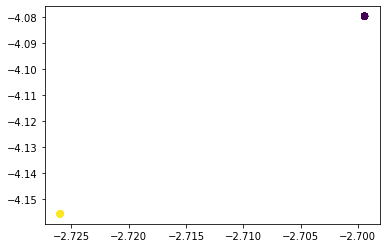

In [54]:
plt.cla()
plt.scatter(predPd[3], predPd[4], c = predPd[0])
plt.show()

### JSON

In [55]:
json = spSession.read.json("data/funcionarios.json")

In [56]:
json.take(3)

[Row(deptid='1000', idade='42', nome='Gilmar Rezende', salario='5000', sexo='m'),
 Row(deptid='2000', idade='50', nome='Matias Tavares', salario='8500', sexo='m'),
 Row(deptid='1000', idade='36', nome='Paulo Miranda', salario='9700', sexo='m')]

In [57]:
json.count()

5

In [58]:
json.show()

+------+-----+----------------+-------+----+
|deptid|idade|            nome|salario|sexo|
+------+-----+----------------+-------+----+
|  1000|   42|  Gilmar Rezende|   5000|   m|
|  2000|   50|  Matias Tavares|   8500|   m|
|  1000|   36|   Paulo Miranda|   9700|   m|
|  1000|   41|Ana Paula Soares|   9500|   f|
|  2000|   34|   Carolina Maia|   6500|   m|
+------+-----+----------------+-------+----+



In [59]:
type(json)

pyspark.sql.dataframe.DataFrame

In [60]:
json.printSchema()

root
 |-- deptid: string (nullable = true)
 |-- idade: string (nullable = true)
 |-- nome: string (nullable = true)
 |-- salario: string (nullable = true)
 |-- sexo: string (nullable = true)



In [61]:
json.select("nome").show()

+----------------+
|            nome|
+----------------+
|  Gilmar Rezende|
|  Matias Tavares|
|   Paulo Miranda|
|Ana Paula Soares|
|   Carolina Maia|
+----------------+



In [62]:
json.filter(json["idade"] == 50).show()

+------+-----+--------------+-------+----+
|deptid|idade|          nome|salario|sexo|
+------+-----+--------------+-------+----+
|  2000|   50|Matias Tavares|   8500|   m|
+------+-----+--------------+-------+----+



In [63]:
json.groupBy("sexo").count().show()

+----+-----+
|sexo|count|
+----+-----+
|   m|    4|
|   f|    1|
+----+-----+



In [67]:
json.groupBy("deptid").agg({"salario": "avg", "idade": "max"}).show()

+------+----------+-----------------+
|deptid|max(idade)|     avg(salario)|
+------+----------+-----------------+
|  2000|        50|           7500.0|
|  1000|        42|8066.666666666667|
+------+----------+-----------------+



In [65]:
# spark 1.X
json.registerTempTable("funcTB")

In [68]:
spSession.sql("select * from funcTB").show()

+------+-----+----------------+-------+----+
|deptid|idade|            nome|salario|sexo|
+------+-----+----------------+-------+----+
|  1000|   42|  Gilmar Rezende|   5000|   m|
|  2000|   50|  Matias Tavares|   8500|   m|
|  1000|   36|   Paulo Miranda|   9700|   m|
|  1000|   41|Ana Paula Soares|   9500|   f|
|  2000|   34|   Carolina Maia|   6500|   m|
+------+-----+----------------+-------+----+



In [69]:
# spark 2.x+
json.createTempView("funcTB2")

In [71]:
spSession.sql("select * from funcTB2").show()

+------+-----+----------------+-------+----+
|deptid|idade|            nome|salario|sexo|
+------+-----+----------------+-------+----+
|  1000|   42|  Gilmar Rezende|   5000|   m|
|  2000|   50|  Matias Tavares|   8500|   m|
|  1000|   36|   Paulo Miranda|   9700|   m|
|  1000|   41|Ana Paula Soares|   9500|   f|
|  2000|   34|   Carolina Maia|   6500|   m|
+------+-----+----------------+-------+----+



### Temp Tables
* Utilizado para SQL Ansi


In [75]:
json.createOrReplaceTempView("funcTB")

In [76]:
spSession.sql("select * from funcTB").show(2)

+------+-----+--------------+-------+----+
|deptid|idade|          nome|salario|sexo|
+------+-----+--------------+-------+----+
|  1000|   42|Gilmar Rezende|   5000|   m|
|  2000|   50|Matias Tavares|   8500|   m|
+------+-----+--------------+-------+----+
only showing top 2 rows



In [88]:
sqlContext.registerDataFrameAsTable(json, "funcTB3")

In [79]:
spSession.sql("select * from funcTB3").show(2)

+------+-----+--------------+-------+----+
|deptid|idade|          nome|salario|sexo|
+------+-----+--------------+-------+----+
|  1000|   42|Gilmar Rezende|   5000|   m|
|  2000|   50|Matias Tavares|   8500|   m|
+------+-----+--------------+-------+----+
only showing top 2 rows



In [89]:
# referenciando o temp table a um objeto
funcTB3 = spSession.table("funcTB3")

In [90]:
type(funcTB3)

pyspark.sql.dataframe.DataFrame

In [92]:
funcTB3.filter(funcTB3["idade"] == 42).first()

Row(deptid='1000', idade='42', nome='Gilmar Rezende', salario='5000', sexo='m')

In [93]:
# comparando dataframe com table
sorted(funcTB3.collect()) == sorted(json.collect())

True

In [94]:
sqlContext.dropTempTable("funcTB3")